# Internet Firewall Data

## 1.Importing necessary libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the dataset

In [44]:
df=pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


## 3. Datapreprocessing and Exploratory Data Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


Comment:

12 features and 65532 instances

No null values

In [50]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000



Comment:

Outliers are present as the gap between minimum or maximum value with median is more.

Mean value is more than median in majority of cases , hence right skewed.

In [53]:
df.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

In [55]:
df.shape

(65532, 12)

In [57]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

Comment:

Fields pkts_sent,pkts_received and action(target) to be renamed for better readability.

In [60]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Action                      4
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
dtype: int64

In [62]:
df['Action'].value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [64]:
df['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [66]:
df=df[df['Action']!='reset-both']

In [68]:
df['Action'].unique()

array(['allow', 'drop', 'deny'], dtype=object)

Comment:

 'reset-both' has only 54 rows compared to other classes.Model will not learn enough from this 54 samples. It might completely ignore or predict something else.Hence it is better to drop the class as it is irrelevent.

In [71]:
df.drop(columns=['Bytes'],inplace=True) # Dropping field 'Bytes' as already fields 'Bytes Sent' and 'Bytes Received' are available.

In [73]:
df.isnull().sum()                    # Checking for null values

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

Comment:

No null values

In [76]:
df.duplicated().sum()                   # Checking for duplicate values

8362

In [78]:
duplicate =df[df.duplicated()]         # Displaying duplicate rows
duplicate

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
268,21268,62609,0,0,deny,146,0,1,0,1,0
351,48706,23393,0,0,deny,60,0,1,0,1,0
593,65003,57470,0,0,deny,78,0,1,0,1,0
632,443,49988,0,0,deny,82,0,1,0,1,0
661,10669,49756,0,0,deny,60,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65517,54874,445,0,0,drop,70,0,1,0,1,0
65519,49784,445,0,0,drop,70,0,1,0,1,0
65521,42995,26467,0,0,deny,62,0,1,0,1,0
65522,53314,64097,0,0,deny,66,0,1,0,1,0


In [80]:
df.drop_duplicates(keep='last',inplace=True)     # Removing duplicates

In [82]:
df.duplicated().sum()                           # Rechecking for duplicated value after removal

0

### Outlier Detection and Handling

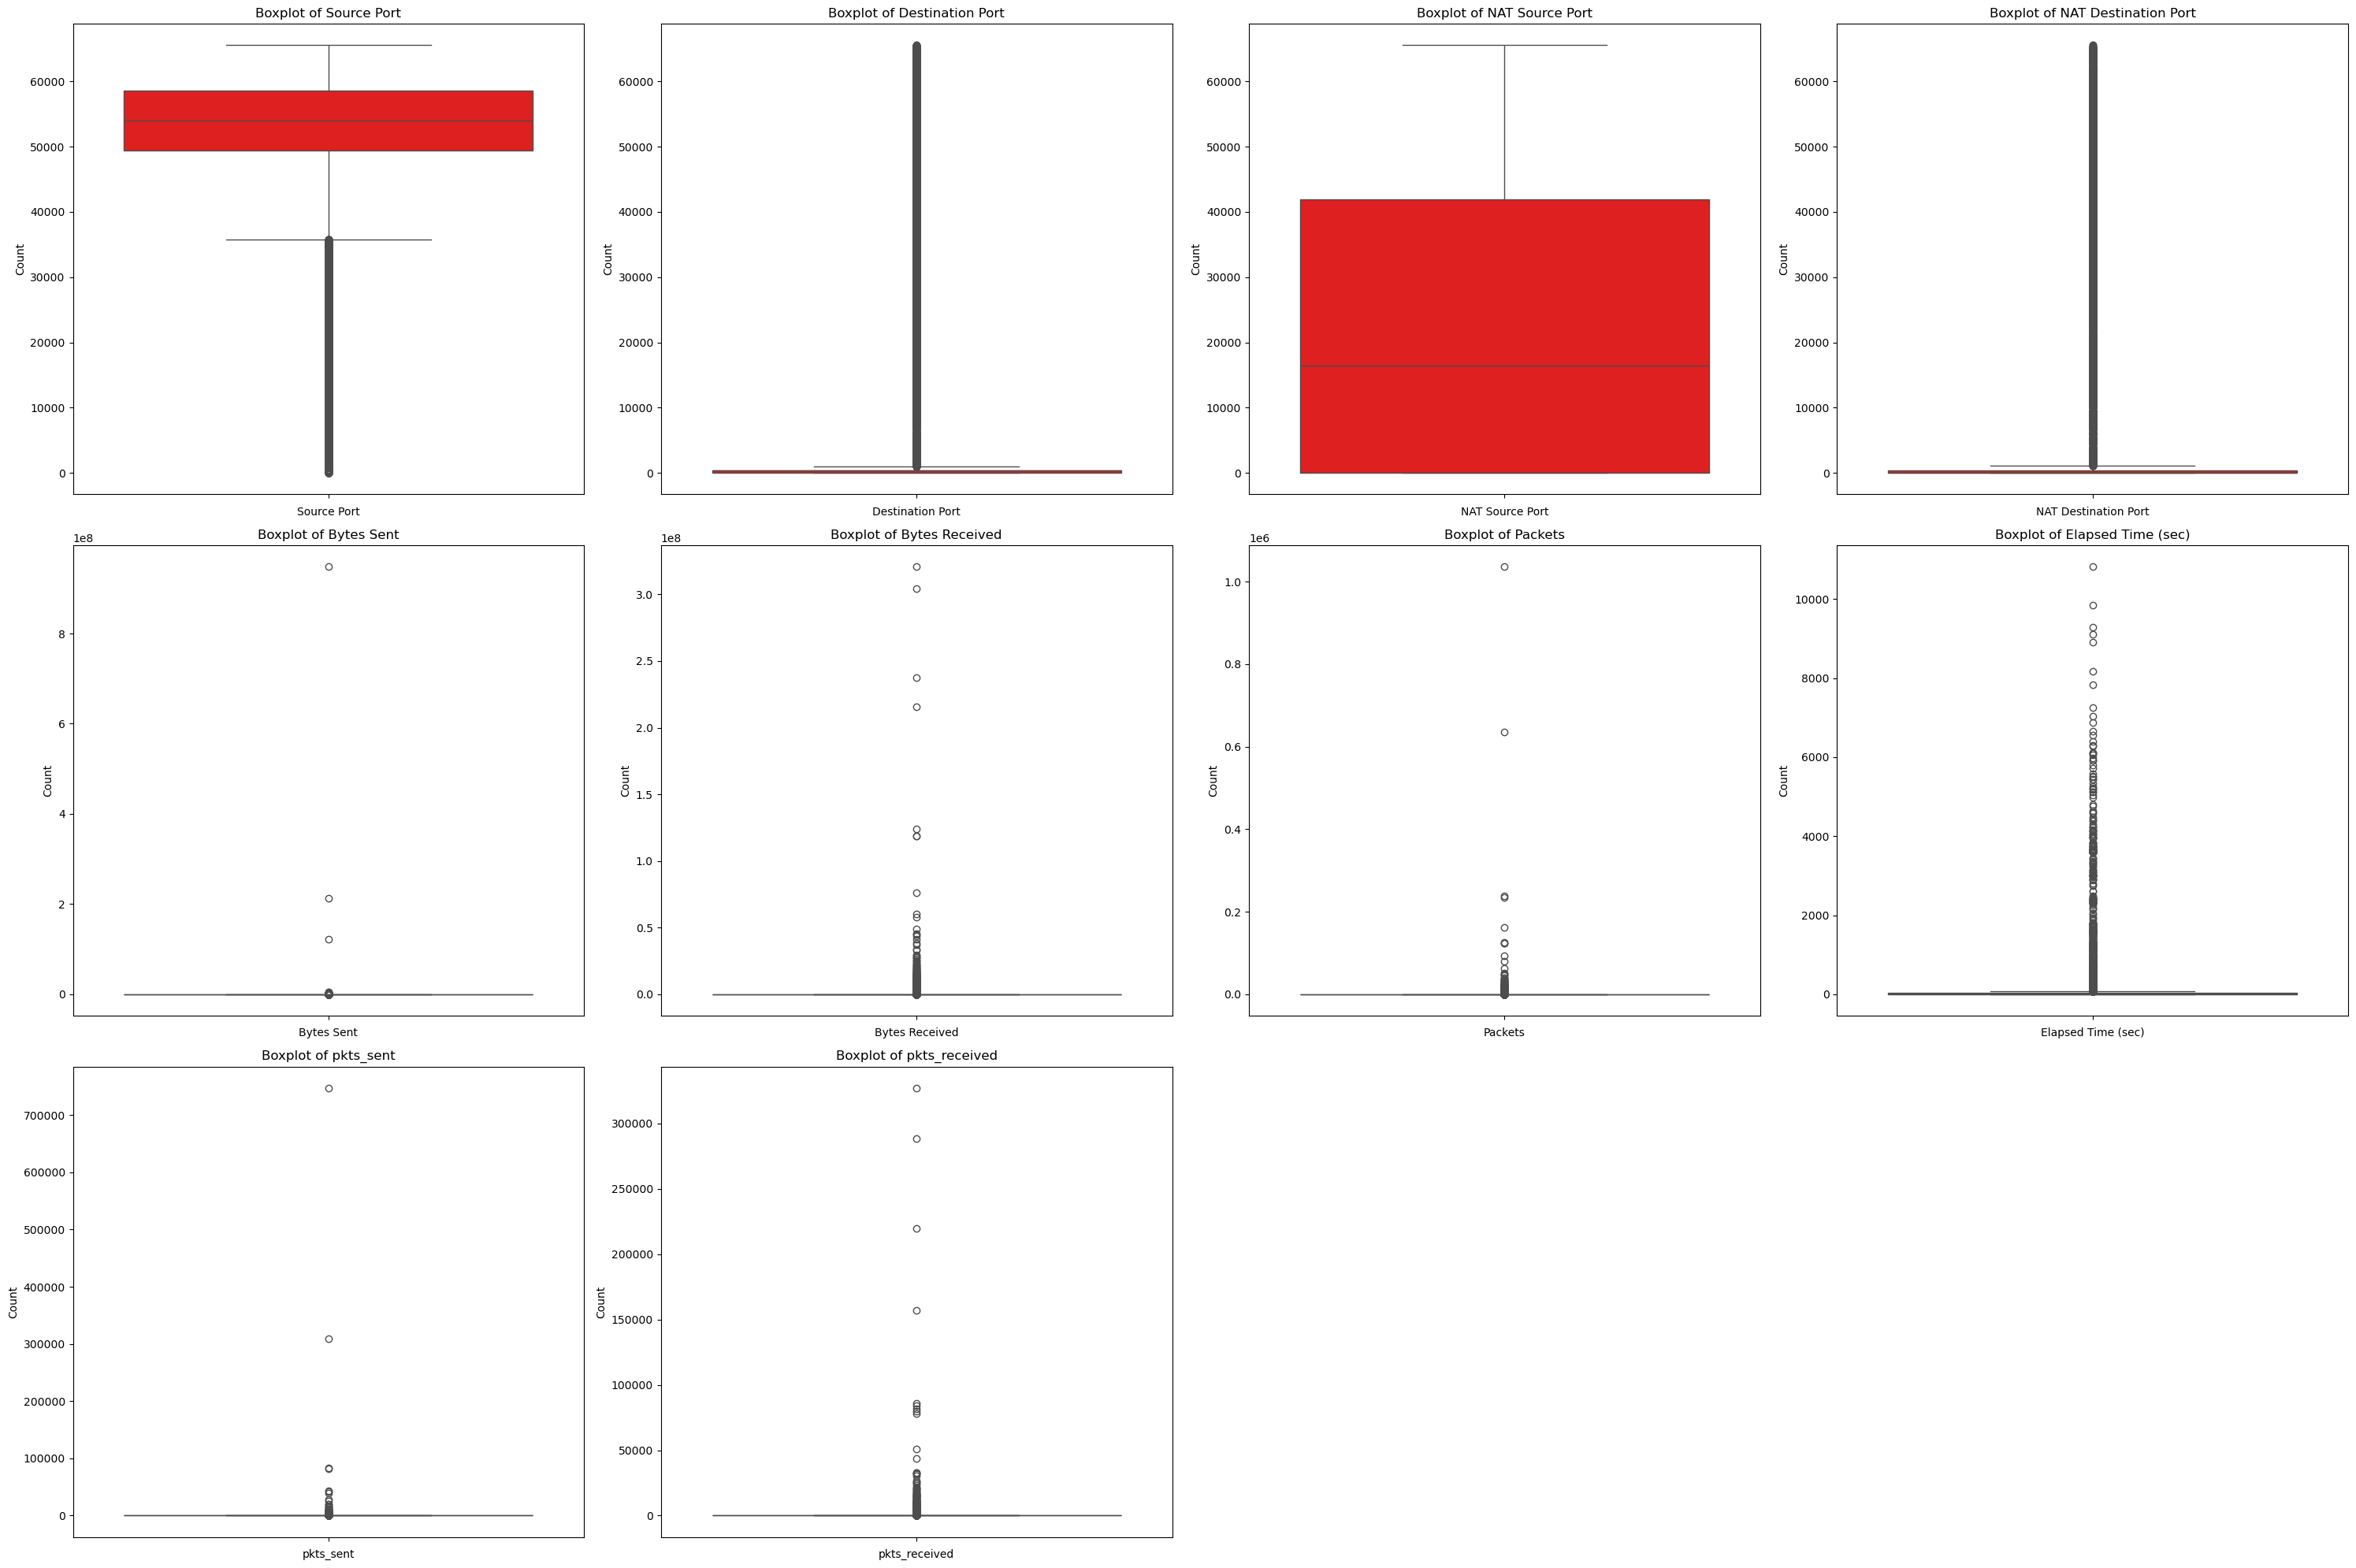

In [85]:
# Boxplot for outlier detection
num_feature=df.drop(columns='Action')
plt.figure(figsize=(30,20))
for index,col in enumerate(num_feature,1):
    plt.subplot(3,4,index)
    sns.boxplot(y=df[col],color='red')
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [87]:
# Handling outliers using IQR method and clipping using clip()
for col in num_feature:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)

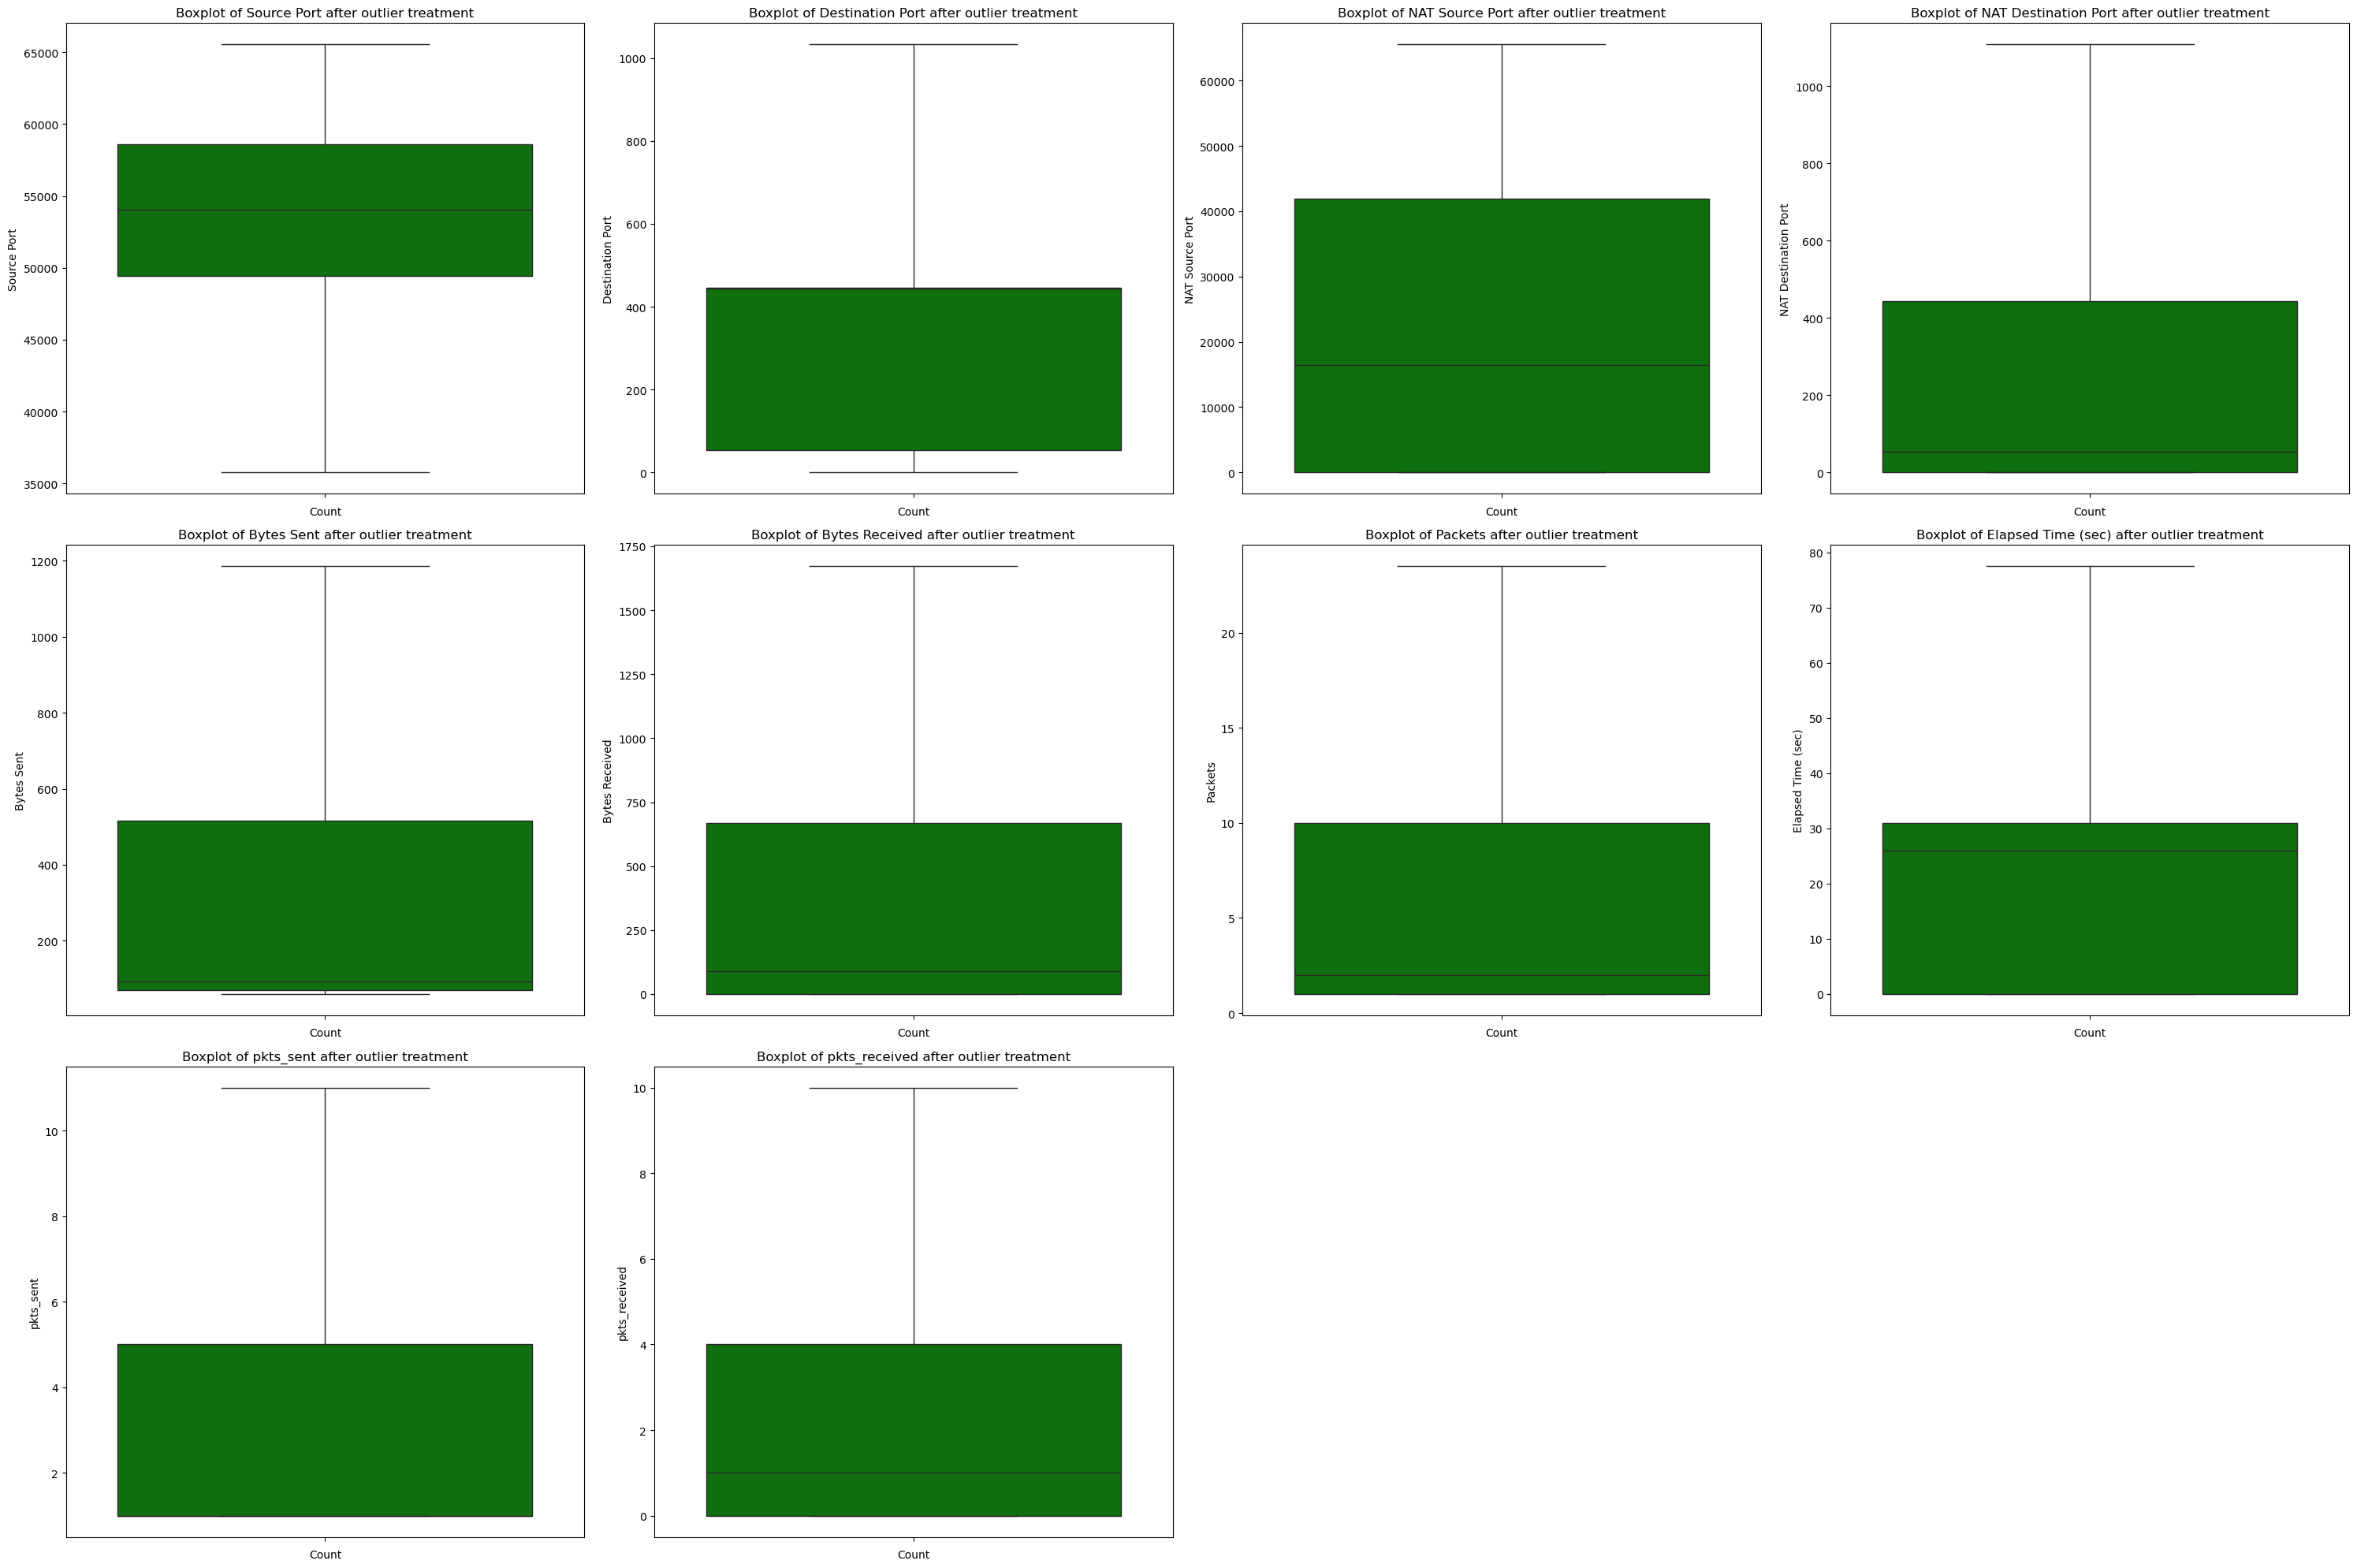

In [89]:
# Box plot after handling outliers
plt.figure(figsize=(30,20))
for index,col in enumerate(num_feature,1):
    plt.subplot(3,4,index)
    sns.boxplot(y=df[col],color="green")
    plt.title(f"Boxplot of {col} after outlier treatment")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [90]:
# Skewness checking
for col in num_feature:
    skew=round(df[col].skew(),2)
    print(f"Skewness of {col} is {skew}")

Skewness of Source Port is -0.63
Skewness of Destination Port is 0.54
Skewness of NAT Source Port is 0.48
Skewness of NAT Destination Port is 1.67
Skewness of Bytes Sent is 1.21
Skewness of Bytes Received is 1.19
Skewness of Packets is 1.29
Skewness of Elapsed Time (sec) is 0.92
Skewness of pkts_sent is 1.22
Skewness of pkts_received is 1.22


In [93]:
# Displaying fields with skewness greater than 1
print("Fields with skewness greater than 1 :\n")
h_skew=[]
for col in num_feature:
    skew=round(df[col].skew(),2)
    if abs(skew)>1:
        print(f"Skewness of {col} is {skew}")
        h_skew.append(col)

Fields with skewness greater than 1 :

Skewness of NAT Destination Port is 1.67
Skewness of Bytes Sent is 1.21
Skewness of Bytes Received is 1.19
Skewness of Packets is 1.29
Skewness of pkts_sent is 1.22
Skewness of pkts_received is 1.22


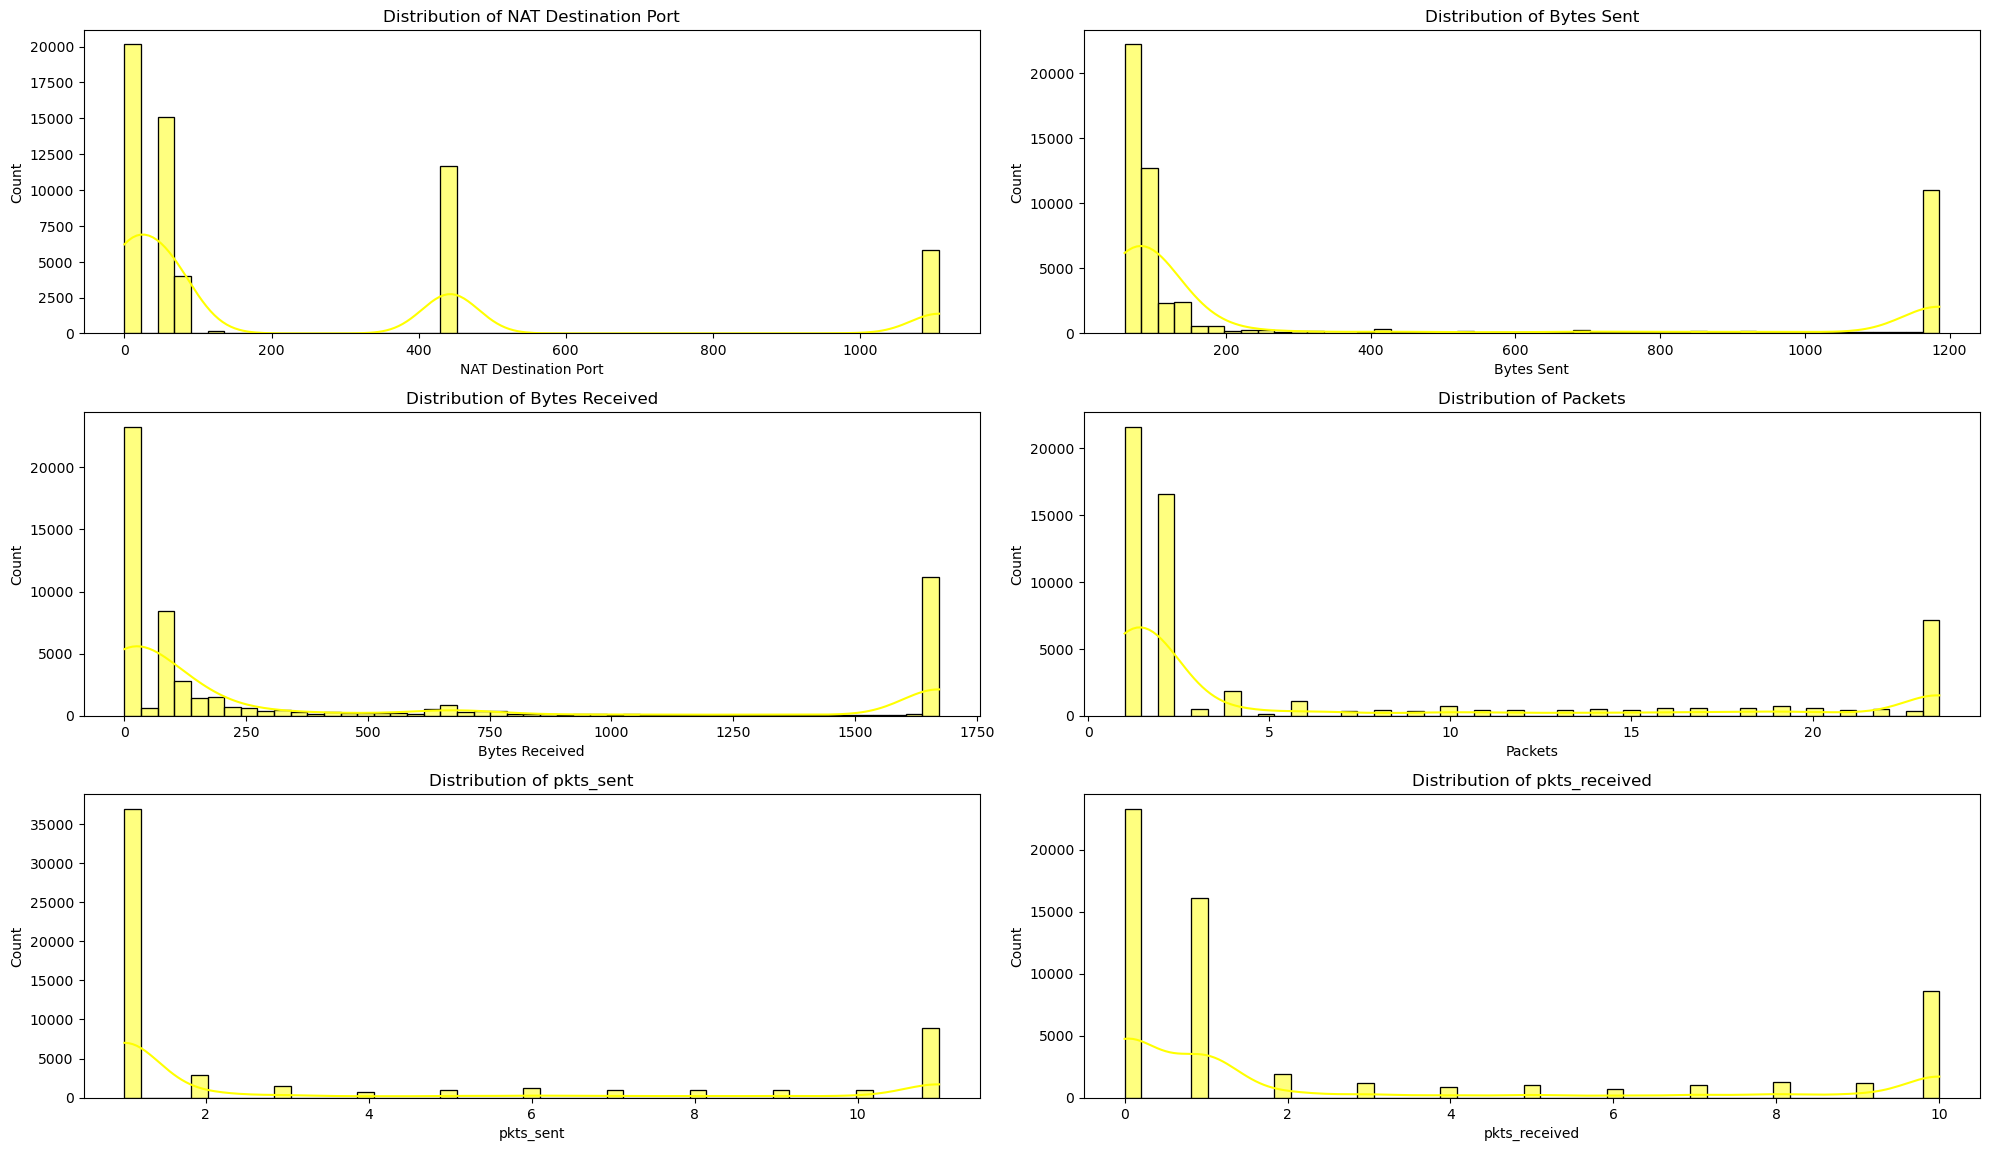

In [95]:
# Visualization of skewness before transformation 
plt.figure(figsize=(20,15))
for index,col in enumerate(h_skew,1):
    plt.subplot(4,2,index)
    sns.histplot(data=df[col],color='yellow',kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [97]:
# Checking for zero and negative values in the highly skewed field
for col in h_skew:
    zero_count=(df[col]==0).sum()
    negative_count=(df[col]<1).sum()
    if zero_count>0:
        print(f"Column {col} has zero value.")
    if negative_count>0:
        print(F"Column {col} has negative value.")

Column NAT Destination Port has zero value.
Column NAT Destination Port has negative value.
Column Bytes Received has zero value.
Column Bytes Received has negative value.
Column pkts_received has zero value.
Column pkts_received has negative value.


In [99]:
# Treating skewness using cbrt transformation
for col in num_feature:
    skew=round(df[col].skew(),2)
    if abs(skew)>1:
        df[col]=np.cbrt(df[col])

In [101]:
# Rechecking skewness after transformation
for col in h_skew:
    skew=round(df[col].skew(),2)
    print(F"Skewness of {col} is {skew}")

Skewness of NAT Destination Port is 0.35
Skewness of Bytes Sent is 1.05
Skewness of Bytes Received is 0.41
Skewness of Packets is 0.99
Skewness of pkts_sent is 1.04
Skewness of pkts_received is 0.28


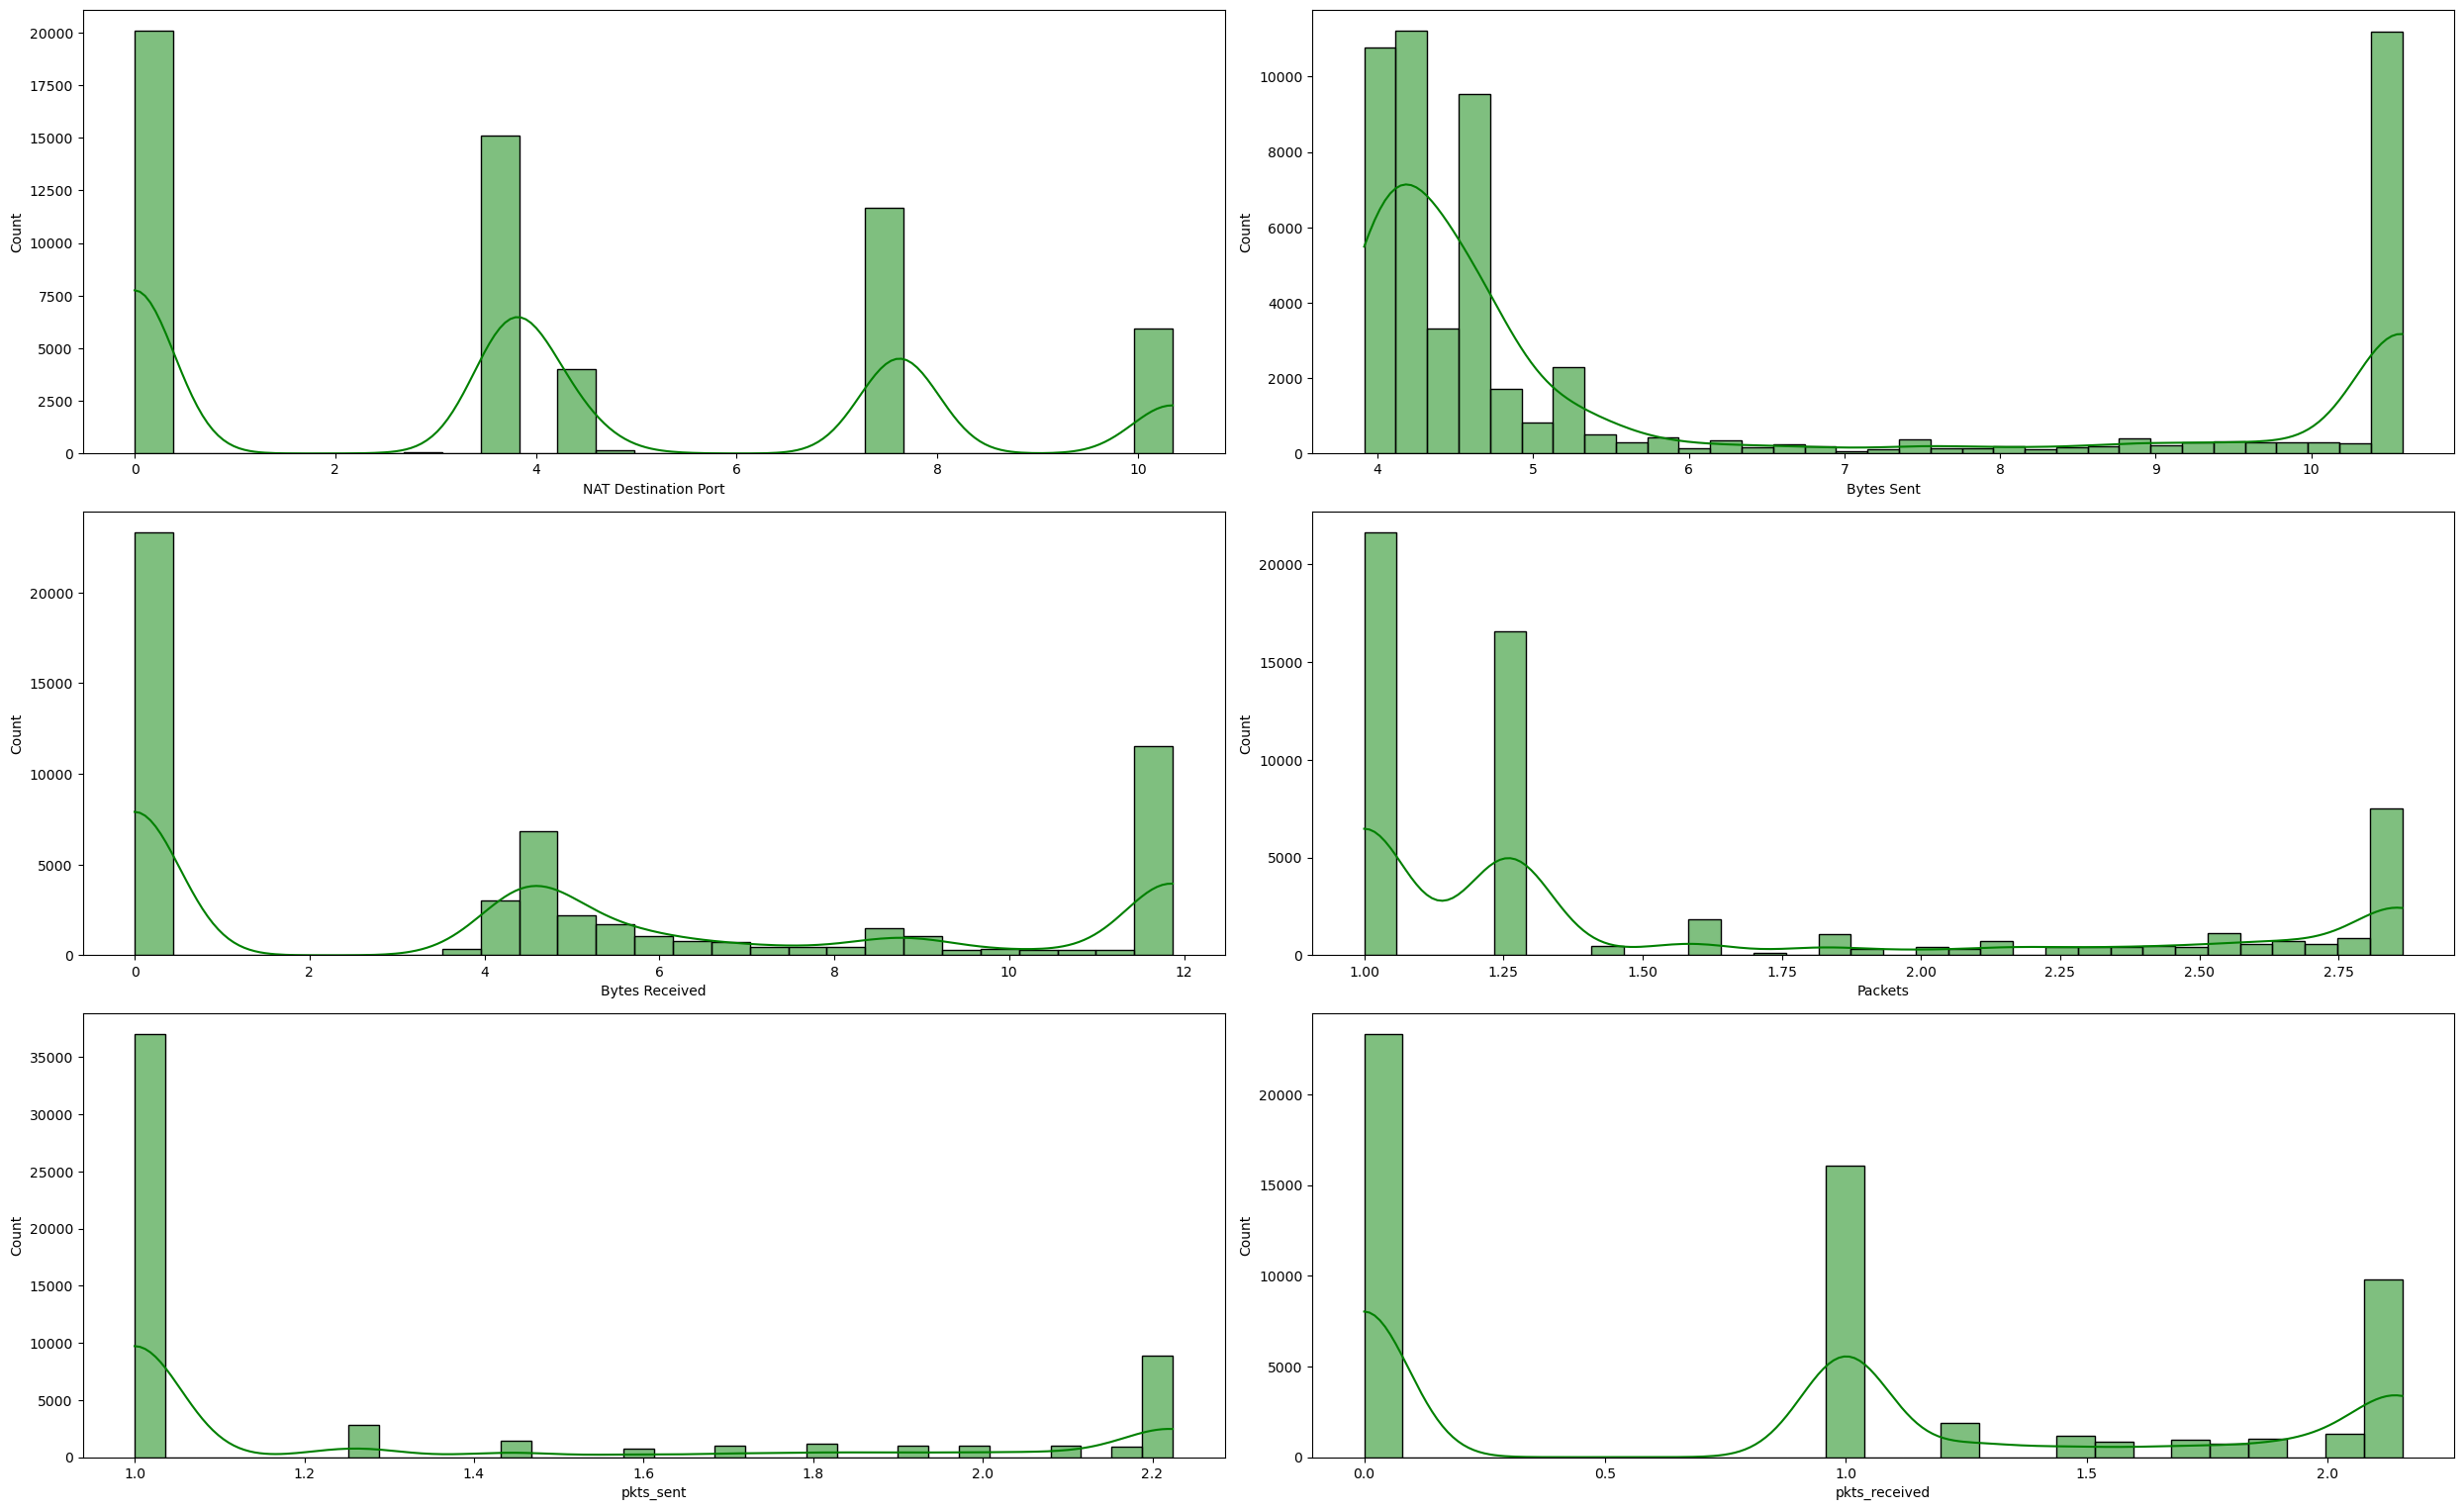

In [103]:
# Visualizing skewness after transformation
plt.figure(figsize=(25,20))
for index,col in enumerate(h_skew,1):
    plt.subplot(4,2,index)
    sns.histplot(data=df[col],color='green',kde=True)
plt.tight_layout()
plt.show()

Comment:

Skewness is treated with cbrt transformation as the numerical feature NAT Destination Port,
Bytes Received and pkts_received has zero and negative values.

Skewness of NAT Destination Port,Bytes Received and pkts_received is with in the acceptable range of -0.5 to 0.5.

Skewness of Bytes,Bytes Sent,Packets and pkts_sent is reduced but still on higher side.


In [106]:
# Rechecking for null values
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [108]:
# Rechecking duplicate rows
df.duplicated().sum()

3594

In [110]:
df.drop_duplicates(keep='last',inplace=True)

In [112]:
df.duplicated().sum()

0

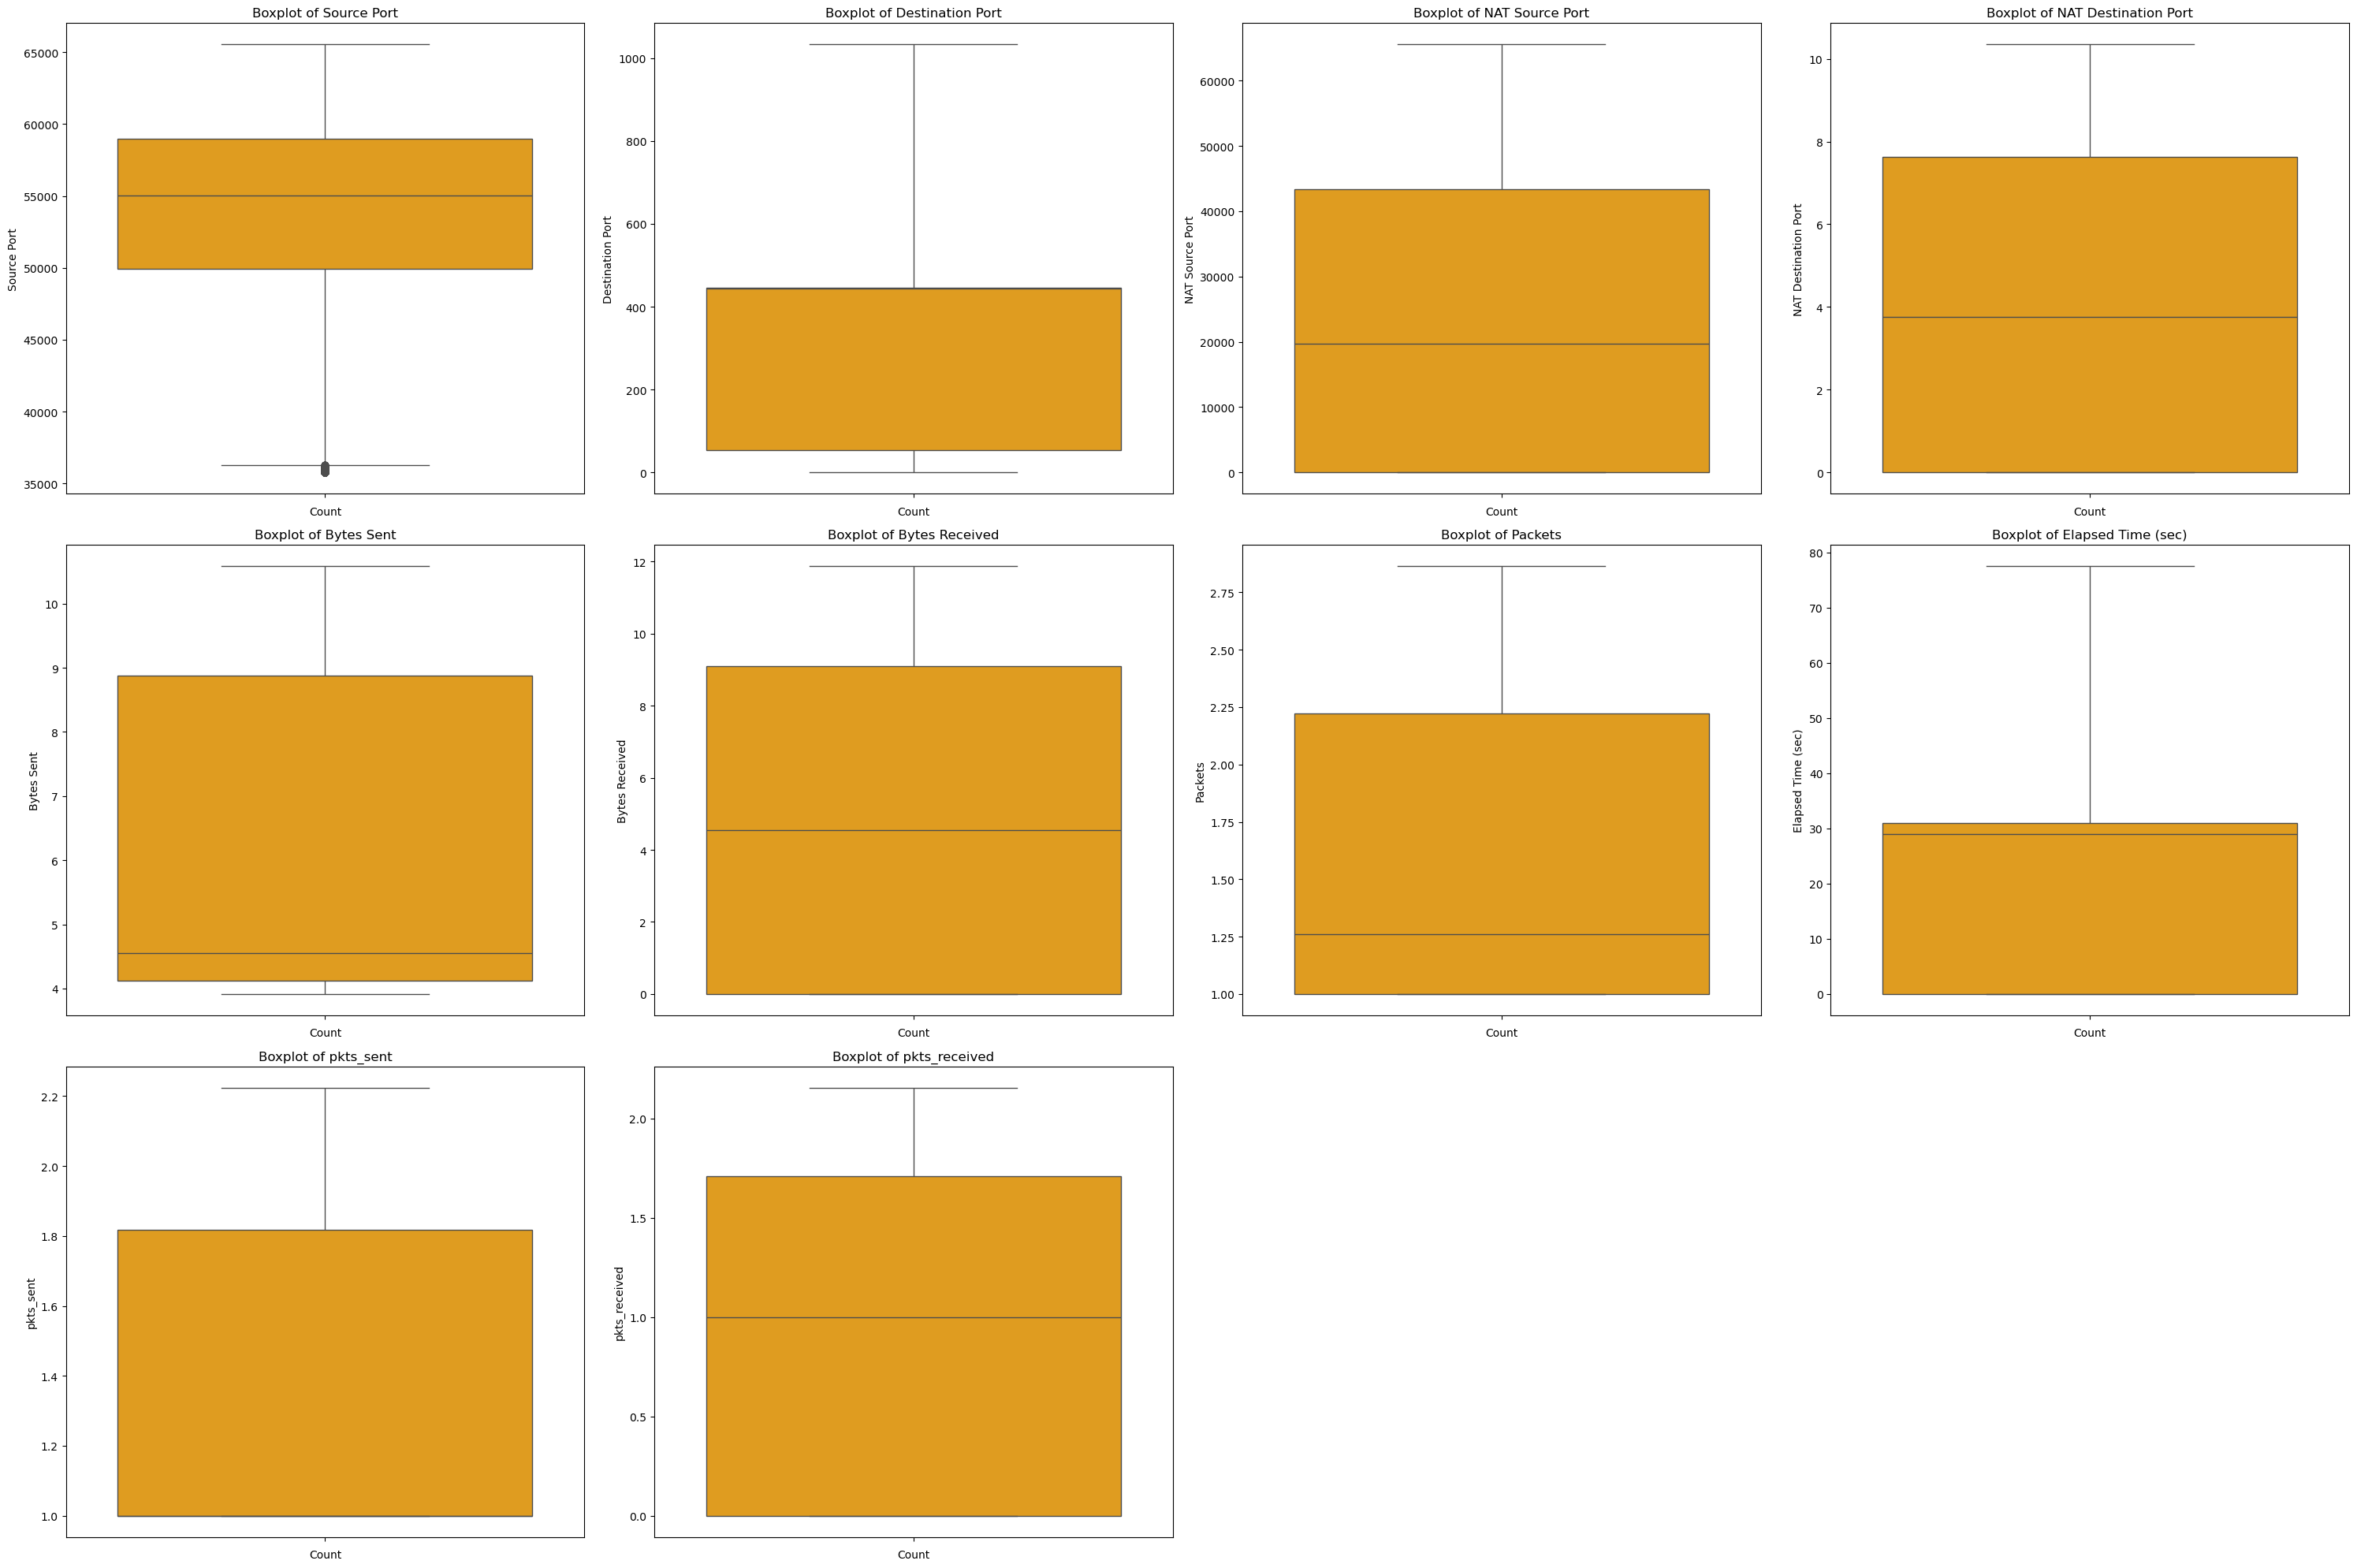

In [114]:
# Rechecking outliers
plt.figure(figsize=(30,20))
for index,col in enumerate(num_feature,1):
    plt.subplot(3,4,index)
    sns.boxplot(y=df[col],color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [115]:
# Treating outlier for source port
Q1=df['Source Port'].quantile(0.25)
Q3=df['Source Port'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
df['Source Port']=df['Source Port'].clip(lower=lower_bound)

Text(0, 0.5, 'Count')

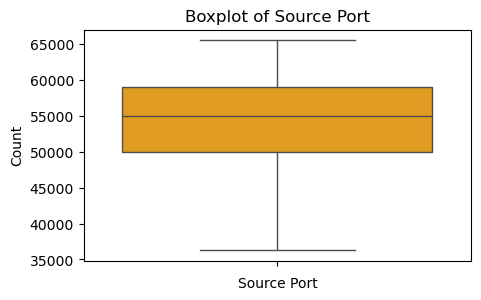

In [118]:
# Rechecking outlier for feature Source Port
plt.figure(figsize=(5,3))
sns.boxplot(y=df['Source Port'],color='orange')
plt.title(f"Boxplot of Source Port")
plt.xlabel("Source Port")
plt.ylabel("Count")


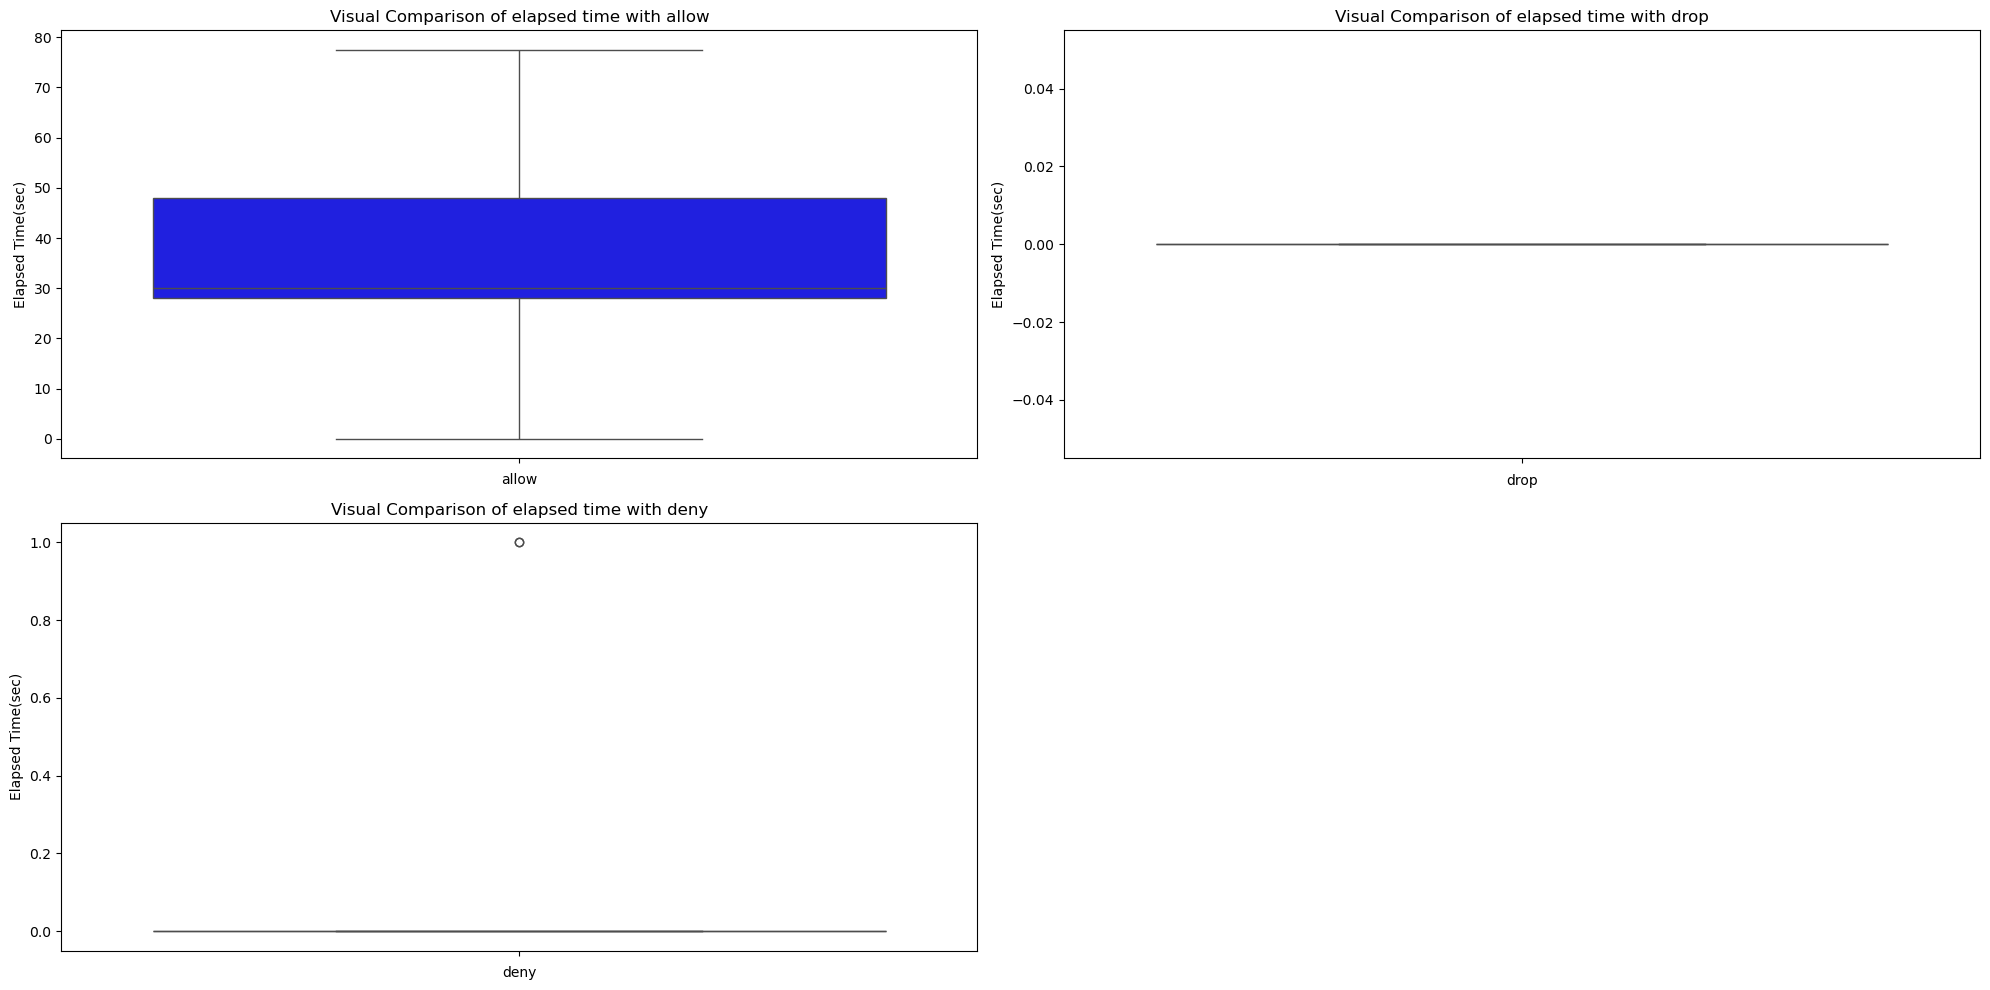

In [120]:
 # 1. Boxplot – Visual Comparison
plt.figure(figsize=(20,10))
for index,col in enumerate(df['Action'].unique(),1):
    plt.subplot(2,2,index)
    sns.boxplot(y=df[df['Action'] == col]['Elapsed Time (sec)'], color='blue')
    plt.title(f"Visual Comparison of elapsed time with {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Elapsed Time(sec)")
plt.tight_layout()
plt.show()

## 4.Feature Engineering

In [123]:
# Renaming target feature 'Action' as Target for better readability
df.rename(columns={'Action':'Target'},inplace=True)
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Target,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,3.756286,allow,4.546836,4.362071,1.259921,30.0,1.000000,1.000000
1,56258,1033,56258,10.346209,allow,10.583983,11.870127,2.668402,17.0,2.154435,2.080084
2,36291,1033,43265,10.346209,allow,4.904868,4.932424,1.259921,77.5,1.000000,1.000000
3,50553,1033,50553,10.346209,allow,10.583983,11.870127,2.466212,17.0,2.000000,1.912931
4,50002,443,45848,7.623152,allow,10.583983,11.870127,2.864327,16.0,2.223980,2.154435


In [125]:
# Creating a new feature by combining the exisitng features pkts_sent and pkts_received
df['Total_Packets'] = df['pkts_sent'] + df['pkts_received']
df.drop(columns=['Packets','pkts_sent','pkts_received'],inplace=True)

## 5. Encoding categorical feature

In [128]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Target']=lb.fit_transform(df['Target'])
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Target,Bytes Sent,Bytes Received,Elapsed Time (sec),Total_Packets
0,57222,53,54587,3.756286,0,4.546836,4.362071,30.0,2.000000
1,56258,1033,56258,10.346209,0,10.583983,11.870127,17.0,4.234519
2,36291,1033,43265,10.346209,0,4.904868,4.932424,77.5,2.000000
3,50553,1033,50553,10.346209,0,10.583983,11.870127,17.0,3.912931
4,50002,443,45848,7.623152,0,10.583983,11.870127,16.0,4.378415


## 6. Feature Selection

In [131]:
correlation_metrics=df.corr()
correlation_metrics

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Target,Bytes Sent,Bytes Received,Elapsed Time (sec),Total_Packets
Source Port,1.000000,-0.130493,-0.105600,-0.280190,0.224313,-0.249848,-0.242526,-0.203349,-0.243353
Destination Port,-0.130493,1.000000,-0.227741,0.221293,0.212789,-0.026496,-0.254258,-0.216833,-0.180960
NAT Source Port,-0.105600,-0.227741,1.000000,0.576328,-0.668033,0.362240,0.527149,0.465909,0.493007
NAT Destination Port,-0.280190,0.221293,0.576328,1.000000,-0.755990,0.562119,0.631833,0.570545,0.642698
Target,0.224313,0.212789,-0.668033,-0.755990,1.000000,-0.459868,-0.683498,-0.634500,-0.634457
Bytes Sent,-0.249848,-0.026496,0.362240,0.562119,-0.459868,1.000000,0.854840,0.641779,0.935090
Bytes Received,-0.242526,-0.254258,0.527149,0.631833,-0.683498,0.854840,1.000000,0.745463,0.955665
Elapsed Time (sec),-0.203349,-0.216833,0.465909,0.570545,-0.634500,0.641779,0.745463,1.000000,0.728705
Total_Packets,-0.243353,-0.180960,0.493007,0.642698,-0.634457,0.935090,0.955665,0.728705,1.000000


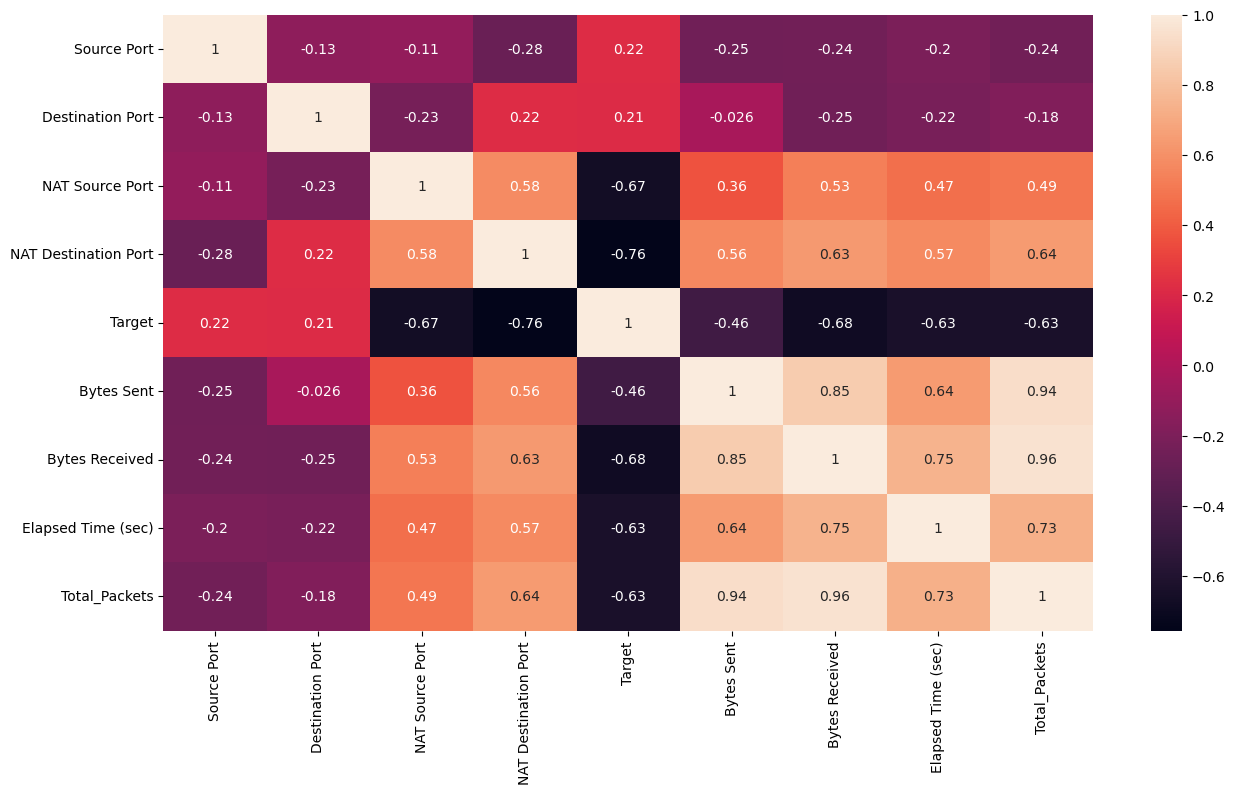

In [133]:
# Visualization of correlation using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_metrics,annot=True,fmt='.2g')
plt.show()

In [135]:
# Relation of variables with Target
relation=df.corr()[['Target']].abs().sort_values(by='Target',ascending=False)
relation

,Target
Target,1.000000
NAT Destination Port,0.755990
Bytes Received,0.683498
NAT Source Port,0.668033
Elapsed Time (sec),0.634500
Total_Packets,0.634457
Bytes Sent,0.459868
Source Port,0.224313
Destination Port,0.212789


In [137]:
# Filtering variable that has correlation value with target less than 0.1
low_relation=relation[relation['Target']<0.1].index.tolist()
low_relation

[]

Comment:

No features with low reation with Target.

In [140]:
# Filtering variable that has correlation value >0.9
h_relation=df.corr(numeric_only=True).abs()
drop_col=[]
for i in range(len(h_relation.columns)):
    for j in range(i):
        if h_relation.iloc[i,j]>0.90:
            colname_i=h_relation.columns[i]
            colname_j=h_relation.columns[j]
            print(f"{colname_i} is highly correlated with {colname_j} :{h_relation.iloc[i,j]:.2f}")
            if colname_i not in drop_col:  # prevent duplicates
                drop_col.append(colname_i)
df= df.drop(columns=drop_col)

Total_Packets is highly correlated with Bytes Sent :0.94
Total_Packets is highly correlated with Bytes Received :0.96


In [142]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Target,Bytes Sent,Bytes Received,Elapsed Time (sec)
0,57222,53,54587,3.756286,0,4.546836,4.362071,30.0
1,56258,1033,56258,10.346209,0,10.583983,11.870127,17.0
2,36291,1033,43265,10.346209,0,4.904868,4.932424,77.5
3,50553,1033,50553,10.346209,0,10.583983,11.870127,17.0
4,50002,443,45848,7.623152,0,10.583983,11.870127,16.0


## 7. Splitting into X and Y

In [145]:
X=df.drop(columns='Target')
y=df["Target"]

## 8. Splitting into test and train data

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

## 9. Checking for imbalance

In [151]:
y.value_counts()

Target
0    37331
2    11635
1     4556
Name: count, dtype: int64

Comment:

0:Allow,1:Deny,2:Drop,3:Reset-both
Here the classes are highly imbalanced. Class 'Allow' is the majority class.As imbalanced data is tend to bias towards majority class, it has to be resampled.

Using SMOTE technique minority classes samples are increased.

In [155]:
# Resampling training data
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_resample,y_train_resample=sm.fit_resample(X_train,y_train)

In [157]:
y_train_resample.value_counts()

Target
0    27998
2    27998
1    27998
Name: count, dtype: int64

## 10. Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train_resample)
X_test_scaled=ss.transform(X_test)

## 11. Training the model

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix
models={'Logistic Regression':LogisticRegression(random_state=42),
        'Decision Tree':DecisionTreeClassifier(random_state=42),
        'Random Forest Classifier':RandomForestClassifier(max_depth=5,random_state=42),
        'Support Vector Classifier':SVC(random_state=42)}
for name,model in models.items():
    model.fit(X_train_scaled,y_train_resample)

## 12. Check for overfitting

In [165]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train_resample)
    y_train_predt=model.predict(X_train_scaled)
    y_test_predt=model.predict(X_test)
    print(f"{name}")
    print("Train Accuracy Score:",accuracy_score(y_train_resample,y_train_predt))
    print("Test Accuracy Score:", accuracy_score(y_test,y_test_predt))

Logistic Regression
Train Accuracy Score: 0.9747362906874301
Test Accuracy Score: 0.24923398849114417
Decision Tree
Train Accuracy Score: 0.9994880586708574
Test Accuracy Score: 0.6974815036245423
Random Forest Classifier
Train Accuracy Score: 0.9975236326404266
Test Accuracy Score: 0.6974815036245423
Support Vector Classifier
Train Accuracy Score: 0.9972140867204801
Test Accuracy Score: 0.6974815036245423


Comment :

Difference between train accuracy score and test accuracy score is more than 20% for all the ML algorithms which suggests overfitting.
For Random Forest and SVM it can be generalized.As random forest is good in handling overfitting and SVM may bias because of overfitting we can select 
random forest classifier for further evaluation.



## 13. Evaluating the model performance


In [168]:
rfc=RandomForestClassifier(max_depth=5,random_state=42)
rfc.fit(X_train_scaled,y_train_resample)
y_predt_rfc=rfc.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test,y_predt_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9333
           1       1.00      0.99      0.99      1139
           2       1.00      1.00      1.00      2909

    accuracy                           1.00     13381
   macro avg       1.00      1.00      1.00     13381
weighted avg       1.00      1.00      1.00     13381



In [169]:
X_train_scaled= pd.DataFrame(X_train_scaled,columns=X_train_resample.columns,index=X_train_resample.index)

In [170]:
X_train_scaled.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes Sent', 'Bytes Received',
       'Elapsed Time (sec)'],
      dtype='object')

## 13. Prediction

In [181]:
features=[[57222,53,54587,53,94,83,30]]
scaled=ss.transform(features)

In [183]:
prediction=rfc.predict(scaled)
if prediction[0]==0:
    print("Connection is safe")
elif prediction[1]==1:
    print("Connection is risky")
else:
    print("Connection is discarded")

Connection is safe


In [185]:
features1=[[13394,23,0,0,60,0,0]]
scaled=ss.transform(features1)

In [187]:
prediction=rfc.predict(scaled)
if prediction[0]==0:
    print("Connection is safe")
elif prediction[0]==1:
    print("Connection is risky")
else:
    print("Connection is discarded")

Connection is risky


In [189]:
features2=[[51048,445,0,0,70,0,0]]
scaled=ss.transform(features2)

In [191]:
prediction=rfc.predict(scaled)
if prediction[0]==0:
    print("Connection is safe")
elif prediction[0]==1:
    print("Connection is risky")
else:
    print("Connection is discarded")

Connection is discarded
